In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from PIL import Image, ImageStat
os.chdir('..')
import tools.util as util
# os.chdir('CS156b/2023/yasers_beavers/visualizations/')
os.chdir('/')
print(os.listdir())
import tqdm
import numpy as np
print('hello')

['boot', 'tmp', 'var', 'bin', 'groups', 'home', 'lib', 'lib64', 'sbin', 'software', 'cm', 'dev', 'etc', 'gpfs', 'home.dist', 'local', 'media', 'ml', 'mnt', 'opt', 'proc', 'root', 'run', 'srv', 'sys', 'tftpboot', 'usr', '.autorelabel', '.readahead', 'RPMs_login-1.1-mlnx', 'central', 'testfs', 'programs', 'gcp', 'newgcp', 'net', 'grub.out', 'misc', 'hs_err_pid140622.log']
hello


In [33]:
df = util.get_image_df()
df = df.drop('Unnamed: 0.1', axis=1)
df = df.drop('Unnamed: 0', axis=1)
df['NoFinding'] = df['No Finding']
df.drop('No Finding',axis=1)
df

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Pneumonia,Pleural Effusion,Pleural Other,Fracture,Support Devices,NoFinding
0,train/pid50512/study1/view1_frontal.jpg,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
1,train/pid21580/study2/view1_frontal.jpg,Female,87,Frontal,AP,-1.0,NaN,0.0,1.0,NaN,0.0,NaN,1.0,NaN,-1.0
2,train/pid21580/study1/view1_frontal.jpg,Female,83,Frontal,AP,-1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,-1.0
3,train/pid21580/study1/view2_lateral.jpg,Female,83,Lateral,NaN,-1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,-1.0
4,train/pid33839/study1/view1_frontal.jpg,Male,41,Frontal,AP,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178153,train/pid16708/study2/view1_frontal.jpg,Male,59,Frontal,AP,-1.0,NaN,NaN,0.0,NaN,1.0,NaN,NaN,NaN,-1.0
178154,train/pid16708/study1/view1_frontal.jpg,Male,59,Frontal,AP,0.0,NaN,NaN,0.0,-1.0,0.0,NaN,NaN,NaN,0.0
178155,train/pid32381/study1/view1_frontal.jpg,Female,0,Frontal,AP,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
178156,train/pid25865/study1/view1_frontal.jpg,Female,0,Frontal,AP,-1.0,NaN,1.0,1.0,0.0,NaN,NaN,NaN,-1.0,-1.0


In [34]:
def make_piechart(input_df, labels, column, name):
    labels = labels
    findings = [len([None for find in input_df[column] if find == val]) for val in labels]

    fig, ax = plt.subplots()
    ax.pie(findings, labels=labels)
    ax.set_facecolor("white")
    ax.set_title(name)
    # fig.savefig(f'figures/{name}')
    plt.show()

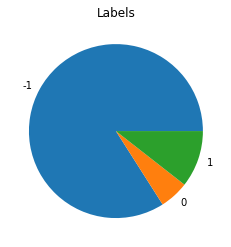

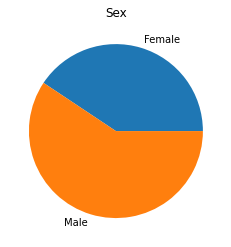

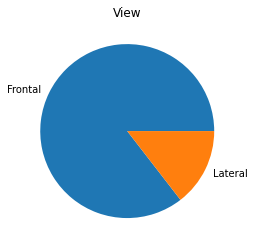

In [35]:
# data statiscs
# labels
make_piechart(df, [-1,0,1], 'NoFinding', 'Labels')
make_piechart(df, ['Female', 'Male'], 'Sex', 'Sex')
make_piechart(df, ['Frontal', 'Lateral'], 'Frontal/Lateral', 'View')

In [36]:
labels = ['Enlarged Cardiomediastinum',
          'Cardiomegaly',
          'Lung Opacity',
          'Pneumonia',
          'Pleural Effusion',
          'Pleural Other',
          'Fracture',
          'Support Devices']
findings = {col : {value : (np.sum(np.array(df[col]) == value) / len(df)) * 100 for value in [-1, 0, 1]} for col in labels}

for lbl in findings.keys():
    findings[lbl][pd.NA] = 100 - np.sum([findings[lbl][key] for key in findings[lbl].keys()]) 
print(findings)

{'Enlarged Cardiomediastinum': {-1: 10.184218502677398, 0: 7.340675131063438, 1: 4.194030018298364, <NA>: 78.2810763479608}, 'Cardiomegaly': {-1: 6.9112809977660286, 0: 4.758697336072475, 1: 11.291662456920262, <NA>: 77.03835920924124}, 'Lung Opacity': {-1: 2.8637501543573682, 0: 2.9805004546526117, 1: 47.34673716588646, <NA>: 46.80901222510356}, 'Pneumonia': {-1: 1.1355089302753736, 0: 9.639757967646696, 1: 1.5188765028794666, <NA>: 87.70585659919847}, 'Pleural Effusion': {-1: 15.49860236419358, 0: 5.866141290315338, 1: 38.53152819407492, <NA>: 40.10372815141616}, 'Pleural Other': {-1: 0.06735594247802512, 0: 1.324666868734494, 1: 1.659762682562669, <NA>: 96.94821450622482}, 'Fracture': {-1: 1.514947406234915, 0: 0.6017130861370245, 1: 3.86005680351149, <NA>: 94.02328270411657}, 'Support Devices': {-1: 2.5612097127269053, 0: 1.17929029288609, 1: 52.67010181973305, <NA>: 43.58939817465396}}


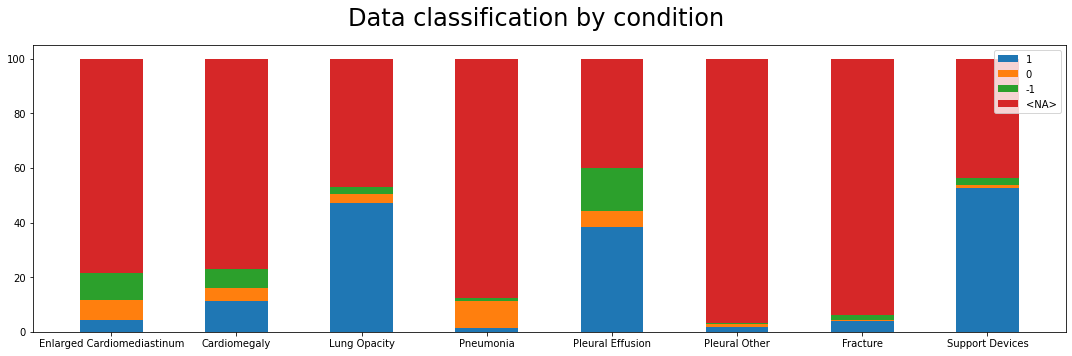

In [37]:
species = labels
weight_counts = {
    1: np.array([findings[col][1] for col in labels]),
    0: np.array([findings[col][0] for col in labels]),
    -1: np.array([findings[col][-1] for col in labels]),
    pd.NA: np.array([findings[col][pd.NA] for col in labels]),
}

# print(weight_counts)
width = 0.5

fig, ax = plt.subplots()
fig.set_size_inches((15,5))
bottom = np.zeros(len(species))

for boolean, weight_count in weight_counts.items():
    p = ax.bar(species, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

fig.suptitle("Data classification by condition", fontsize=24)
ax.legend(loc="upper right")
fig.tight_layout()
plt.show()

In [38]:
findings_df = pd.DataFrame()
data = {lbl : [] for lbl in labels}


for idx, row in tqdm.tqdm(df.iterrows(), total=len(df)):
    for lbl in labels:
        if row['NoFinding'] == 1:
            data[lbl].append(-1)
        else:
            data[lbl].append(row[lbl])

findings_df['Path'] = df['Path']
findings_df['Age'] = df['Age']
findings_df['AP/PA'] = df['AP/PA']
findings_df['Sex'] = df['Sex']
findings_df['NoFinding'] = df['NoFinding']
for lbl in labels:
    findings_df[lbl] = data[lbl]

100%|██████████| 178158/178158 [00:13<00:00, 12740.67it/s]


{'Enlarged Cardiomediastinum': {-1: 16.72167401969039, 0: 7.222802231726893, 1: 4.175507134116907, <NA>: 71.8800166144658}, 'Cardiomegaly': {-1: 15.372871271567934, 0: 4.698638287362902, 1: 11.278752567945306, <NA>: 68.64973787312385}, 'Lung Opacity': {-1: 12.3328730677264, 0: 2.8250204874325036, 1: 47.32821428170501, <NA>: 37.51389216313609}, 'Pneumonia': {-1: 11.145163282030557, 0: 9.612815590655485, 1: 1.5188765028794666, <NA>: 77.7231446244345}, 'Pleural Effusion': {-1: 20.800076336734808, 0: 5.720764714466934, 1: 38.524231300306475, <NA>: 34.954927648491775}, 'Pleural Other': {-1: 10.61754173261936, 0: 1.3184925740073417, 1: 1.6535883878355166, <NA>: 86.41037730553778}, 'Fracture': {-1: 11.386522075910147, 0: 0.5618608201708596, 1: 3.855566407346288, <NA>: 84.19605069657271}, 'Support Devices': {-1: 12.792577375138922, 0: 1.0097778376497266, 1: 48.50020768082264, <NA>: 37.69743710638871}}


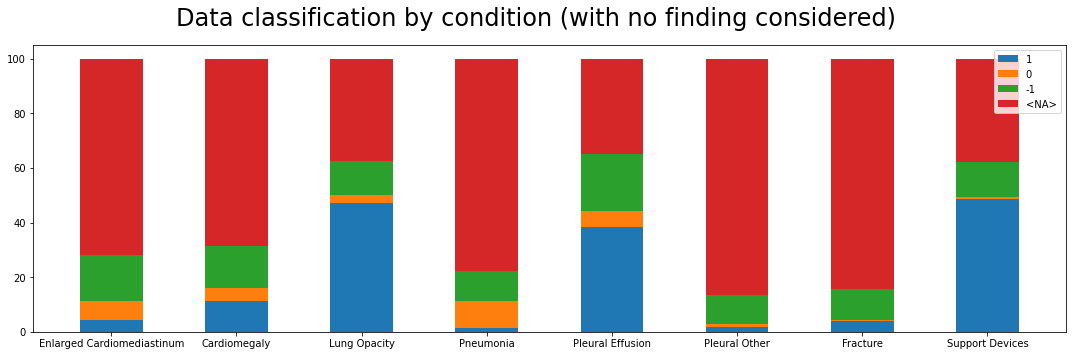

In [39]:
labels = ['Enlarged Cardiomediastinum',
          'Cardiomegaly',
          'Lung Opacity',
          'Pneumonia',
          'Pleural Effusion',
          'Pleural Other',
          'Fracture',
          'Support Devices']
findings = {col : {value : (np.sum(np.array(findings_df[col]) == value) / len(df)) * 100 for value in [-1, 0, 1]} for col in labels}

for lbl in findings.keys():
    findings[lbl][pd.NA] = 100 - np.sum([findings[lbl][key] for key in findings[lbl].keys()]) 
print(findings)

species = labels
weight_counts = {
    1: np.array([findings[col][1] for col in labels]),
    0: np.array([findings[col][0] for col in labels]),
    -1: np.array([findings[col][-1] for col in labels]),
    pd.NA: np.array([findings[col][pd.NA] for col in labels]),
}

# print(weight_counts)
width = 0.5

fig, ax = plt.subplots()
fig.set_size_inches((15,5))
bottom = np.zeros(len(species))

for boolean, weight_count in weight_counts.items():
    p = ax.bar(species, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

fig.suptitle("Data classification by condition (with no finding considered)", fontsize=24)
ax.legend(loc="upper right")
fig.tight_layout()
plt.show()

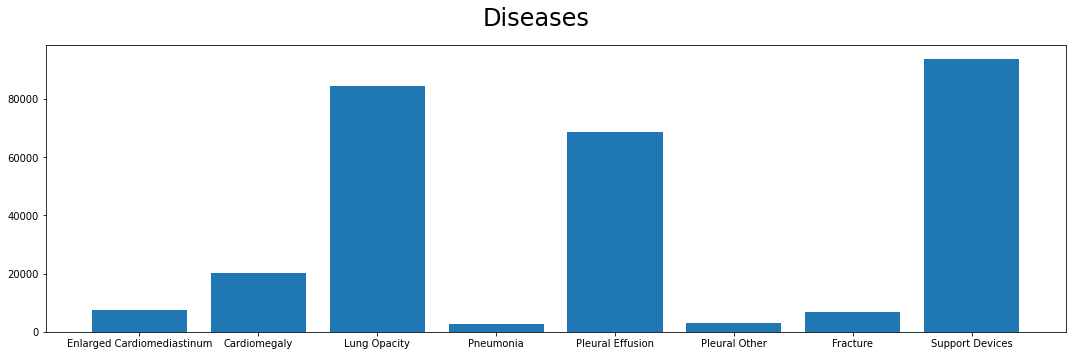

In [40]:
disease_df = df[df.NoFinding == -1]


findings = []
findings = [len([None for point in df[lbl] if point == 1]) for lbl in labels]
fig, ax = plt.subplots()
fig.set_size_inches(15,5)
ax.bar(labels, findings)
ax.set_facecolor("white")
fig.suptitle('Diseases', fontsize=24)
fig.tight_layout()
# fig.savefig(f'figures/Diseases')
plt.show()

# Features

In [41]:
df

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Pneumonia,Pleural Effusion,Pleural Other,Fracture,Support Devices,NoFinding
0,train/pid50512/study1/view1_frontal.jpg,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
1,train/pid21580/study2/view1_frontal.jpg,Female,87,Frontal,AP,-1.0,NaN,0.0,1.0,NaN,0.0,NaN,1.0,NaN,-1.0
2,train/pid21580/study1/view1_frontal.jpg,Female,83,Frontal,AP,-1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,-1.0
3,train/pid21580/study1/view2_lateral.jpg,Female,83,Lateral,NaN,-1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,-1.0
4,train/pid33839/study1/view1_frontal.jpg,Male,41,Frontal,AP,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178153,train/pid16708/study2/view1_frontal.jpg,Male,59,Frontal,AP,-1.0,NaN,NaN,0.0,NaN,1.0,NaN,NaN,NaN,-1.0
178154,train/pid16708/study1/view1_frontal.jpg,Male,59,Frontal,AP,0.0,NaN,NaN,0.0,-1.0,0.0,NaN,NaN,NaN,0.0
178155,train/pid32381/study1/view1_frontal.jpg,Female,0,Frontal,AP,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
178156,train/pid25865/study1/view1_frontal.jpg,Female,0,Frontal,AP,-1.0,NaN,1.0,1.0,0.0,NaN,NaN,NaN,-1.0,-1.0


In [42]:
df = df[0:1000]

def get_brightness(path, size):
    path = 'groups/CS156b/data/' + path
    with Image.open(path) as im:
        im = im.convert('L')
        brightness = ImageStat.Stat(im)
        return brightness.mean[0]

SIZE = 250
df['Brightness'] = df['Path'].apply(lambda x: get_brightness(x, 250))
df

<ipython-input-42-7cf306b7d678>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Brightness'] = df['Path'].apply(lambda x: get_brightness(x, 250))


,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Pneumonia,Pleural Effusion,Pleural Other,Fracture,Support Devices,NoFinding,Brightness
0,train/pid50512/study1/view1_frontal.jpg,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,129.213701
1,train/pid21580/study2/view1_frontal.jpg,Female,87,Frontal,AP,-1.0,NaN,0.0,1.0,NaN,0.0,NaN,1.0,NaN,-1.0,128.413342
2,train/pid21580/study1/view1_frontal.jpg,Female,83,Frontal,AP,-1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,-1.0,130.031745
3,train/pid21580/study1/view2_lateral.jpg,Female,83,Lateral,NaN,-1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,-1.0,128.729709
4,train/pid33839/study1/view1_frontal.jpg,Male,41,Frontal,AP,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,129.613899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,train/pid19775/study1/view1_frontal.jpg,Male,33,Frontal,PA,1.0,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,129.961495
996,train/pid19775/study1/view2_lateral.jpg,Male,33,Lateral,NaN,1.0,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,125.076962
997,train/pid29112/study2/view1_frontal.jpg,Male,69,Frontal,PA,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,131.726518
998,train/pid29112/study2/view2_lateral.jpg,Male,69,Lateral,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,127.384084


In [22]:
df['Brightness'] = (df['Brightness'] - np.mean(df['Brightness'])) / np.std(df['Brightness'])
df

<ipython-input-22-8a952afa25ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Brightness'] = (df['Brightness'] - np.mean(df['Brightness'])) / np.std(df['Brightness'])


,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Pneumonia,Pleural Effusion,Pleural Other,Fracture,Support Devices,NoFinding,Brightness
0,train/pid50512/study1/view1_frontal.jpg,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.252662
1,train/pid21580/study2/view1_frontal.jpg,Female,87,Frontal,AP,-1.0,NaN,0.0,1.0,NaN,0.0,NaN,1.0,NaN,-1.0,0.081586
2,train/pid21580/study1/view1_frontal.jpg,Female,83,Frontal,AP,-1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,-1.0,0.427518
3,train/pid21580/study1/view2_lateral.jpg,Female,83,Lateral,NaN,-1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,-1.0,0.149209
4,train/pid33839/study1/view1_frontal.jpg,Male,41,Frontal,AP,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.338204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,train/pid19775/study1/view1_frontal.jpg,Male,33,Frontal,PA,1.0,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.412503
996,train/pid19775/study1/view2_lateral.jpg,Male,33,Lateral,NaN,1.0,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,-0.631563
997,train/pid29112/study2/view1_frontal.jpg,Male,69,Frontal,PA,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,0.789775
998,train/pid29112/study2/view2_lateral.jpg,Male,69,Lateral,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,-0.138417


In [29]:
df['Age'] = (df['Age'] - np.mean(df['Age'])) / np.std(df['Age'])
df

<ipython-input-29-0e3528c35f25>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = (df['Age'] - np.mean(df['Age'])) / np.std(df['Age'])


,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Pneumonia,Pleural Effusion,Pleural Other,Fracture,Support Devices,NoFinding,Brightness
0,train/pid50512/study1/view1_frontal.jpg,Female,0.569931,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.252662
1,train/pid21580/study2/view1_frontal.jpg,Female,1.641759,Frontal,AP,-1.0,NaN,0.0,1.0,NaN,0.0,NaN,1.0,NaN,-1.0,0.081586
2,train/pid21580/study1/view1_frontal.jpg,Female,1.416111,Frontal,AP,-1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,-1.0,0.427518
3,train/pid21580/study1/view2_lateral.jpg,Female,1.416111,Lateral,NaN,-1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,-1.0,0.149209
4,train/pid33839/study1/view1_frontal.jpg,Male,-0.953194,Frontal,AP,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.338204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,train/pid19775/study1/view1_frontal.jpg,Male,-1.404490,Frontal,PA,1.0,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.412503
996,train/pid19775/study1/view2_lateral.jpg,Male,-1.404490,Lateral,NaN,1.0,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,-0.631563
997,train/pid29112/study2/view1_frontal.jpg,Male,0.626343,Frontal,PA,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,0.789775
998,train/pid29112/study2/view2_lateral.jpg,Male,0.626343,Lateral,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,-0.138417


In [30]:
def make_disease_bar(df, col, yerr):
    """
    df = dataframe
    col = column to analyze
    """
    stats = {key: 0 for key in labels}
    def count(row, stats):
        for lbl in labels:
            if row[lbl] == 1:
                stats[lbl] += row[col]

    df.apply(lambda x : count(x, stats), axis=1)
    quanities = {lbl : len([None for point in df[lbl] if point == 1]) for lbl in labels} 
    stats = {lbl : stats[lbl] / quanities[lbl] for lbl in labels}
    fig, ax = plt.subplots()
    fig.set_size_inches(15,5)
    ax.errorbar(stats.keys(), stats.values(), yerr)
    ax.set_facecolor("white")
    fig.suptitle(col, fontsize=24)
    fig.tight_layout()
    # fig.savefig(f'figures/Diseases')
    plt.show()

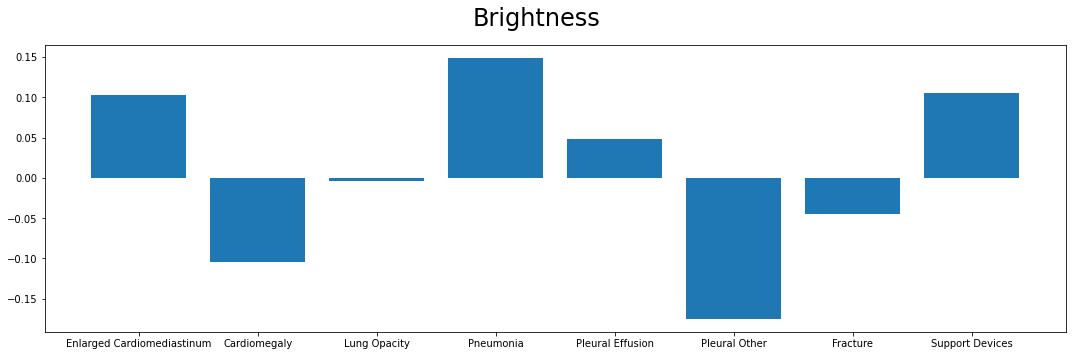

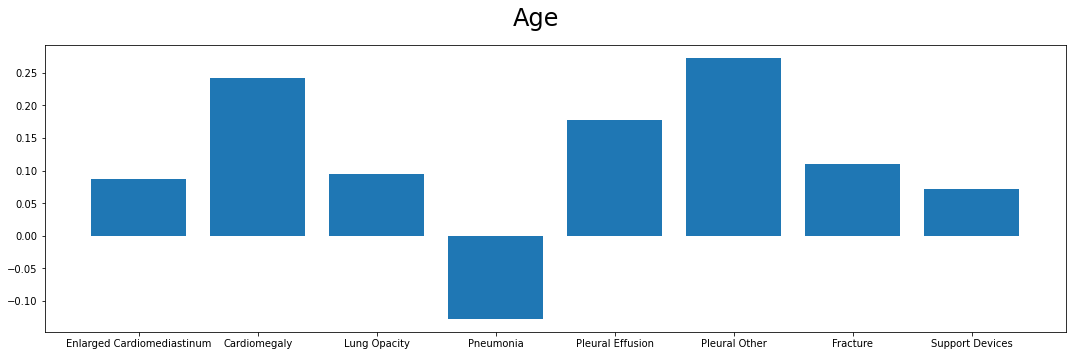

In [31]:
make_disease_bar(df, 'Brightness')
make_disease_bar(df, 'Age')